<a href="https://colab.research.google.com/github/JuuhhCarol/AulasIA/blob/main/AulaCenso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   encoding
label encoding é dar um valor para cada categoria ex vermelho é 1 verde é 2. tem o problema pq pode parecer q uma categoria é maior q a outra devido ao numero de identificação.

*   one-hot encoding
cria cateorias binarias. ele cria uma coluna pra cada classe que existe.exemplo, as cores seram transformadas em verdadeiro ou falso e a cor so vai ser verdadeira na coluna correspondente. nn e bom pra quando tem mtos valores. dummy variable tra, tende a prever valores das colunas, cria relações nn necessárias so pq ele consegue. da pra junta tds os valores em uma coluna virando um grande valor binario.


* biblioteca pickle é um módulo do Python usado para serializar (salvar) e desserializar (carregar) objetos Python em formato binário. Ele permite guardar estruturas como listas, dicionários ou modelos em arquivos e recuperá-los depois. Deve ser usado com cuidado, pois pode executar código malicioso se carregar arquivos de fontes não confiáveis.

* naive bayes vai calcular a probabilidade com base no teorama de bayes.

* metras pra calassificação:
1. tp- true positive, era ss e leu como ss
2. tn- true negative. era nao preveu como nn
3. fp- false positive, era nao preveu como ss
4. fn- false negative, era ss preveu nn





In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from google.colab import files
uploaded = files.upload()


Saving census.csv to census.csv


In [4]:
base_census = pd.read_csv('census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#checando valores unicos
np.unique(base_census['income'],return_counts=True)


(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

/tmp/ipython-input-3662943841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=base_census['income'], palette=['#6E8CFB','#636CCB'] )


<Axes: xlabel='income', ylabel='count'>

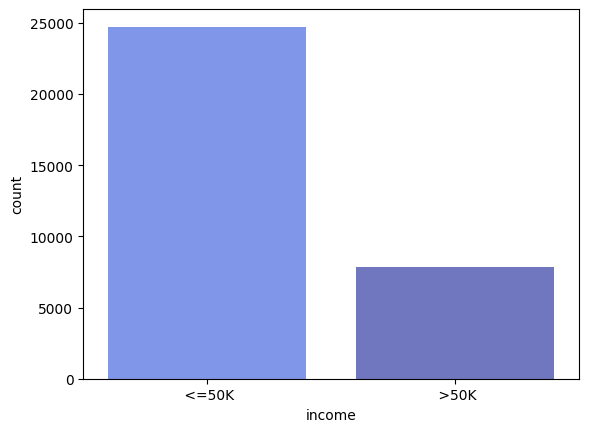

In [6]:
#planilha de barra do seaborn
sns.countplot(x=base_census['income'], palette=['#6E8CFB','#636CCB'] )

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

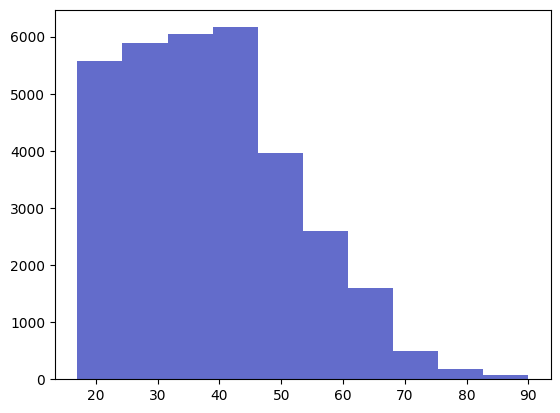

In [7]:
#planilha de barra do mattplot
plt.hist(x = base_census['age'], color='#636CCB')

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

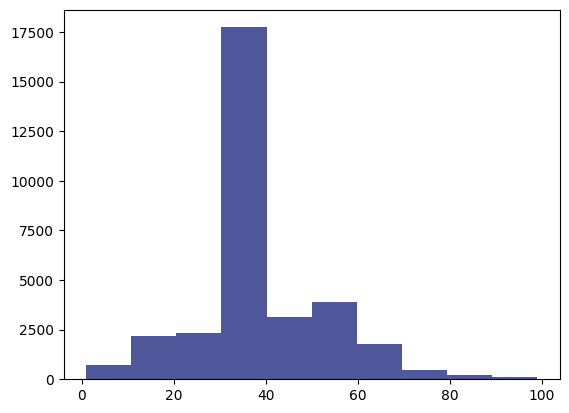

In [8]:
#planilha de barra do mattplot
plt.hist(x = base_census['hour-per-week'], color='#50589C')

In [9]:
#grafico do plotly
grafico = px.treemap(base_census, path=['workclass','age'])
grafico.show()

In [10]:
#grafico do plotly
grafico = px.treemap(base_census, path=['occupation','relationship','age'])
grafico.show()

In [11]:
#grafico do plotly
grafico = px.parallel_categories(base_census, dimensions=['occupation','relationship'])
grafico.show()

In [12]:
#definindo valores
x_census = base_census.iloc[:,0:14].values
y_census = base_census.iloc[:,14].values

In [13]:
#label encoder U.U
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()
x_census[:,1]


array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [14]:
#testes
teste = label_encoder_teste.fit_transform(x_census[:,1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [15]:
#definindo variavel por coluna
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [16]:
#label encoder de fato
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [17]:
#one hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [18]:
x_census = onehotencoder_census.fit_transform(x_census)
x_census[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13 stored elements and shape (1, 108)>

In [19]:
#pra mostrar quantas colunas aumentarem
x_census.shape

(32561, 108)

In [20]:
#treinando a ia
from sklearn.model_selection import train_test_split
x_census_treinamento, x_census_teste,y_census_treinamento, y_census_teste = train_test_split(x_census,y_census, test_size=0.2,random_state = 0)
x_census_treinamento.shape, x_census_teste.shape

((26048, 108), (6513, 108))

In [21]:
#ele cria um arquivo py pra nn ter q rodar td isso dnv dnv e dnv
import pickle
with open ('census.pkl', mode = 'wb') as f:
    pickle.dump([x_census_treinamento, x_census_teste,y_census_treinamento, y_census_teste],f)

In [22]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
import pickle
with open('census.pkl','rb') as f:
    x_census_treinamento, x_census_teste,y_census_treinamento, y_census_teste = pickle.load(f)

naive_census = GaussianNB()
naive_census.fit(x_census_treinamento.toarray(),y_census_treinamento)
previsoes = naive_census.predict(x_census_teste.toarray())
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [23]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [24]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.7936434822662367

0.7936434822662367

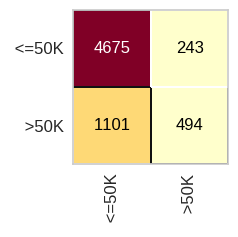

In [25]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento.toarray(), y_census_treinamento)
cm.score(x_census_teste.toarray(), y_census_teste)

In [26]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      4918
        >50K       0.67      0.31      0.42      1595

    accuracy                           0.79      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.78      0.79      0.76      6513



In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = pickle.load(f)

In [32]:
x_census_treinamento.shape, y_census_treinamento.shape

((26048, 108), (26048,))

In [35]:
x_census_teste.shape, y_census_teste.shape

((6513, 108), (6513,))

In [36]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit( x_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [37]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [38]:
y_census_teste


array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype=object)

In [39]:
accuracy_score(y_census_teste,previsoes)

0.7878089973898357

0.7878089973898357

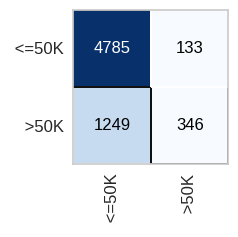

In [40]:
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(knn_census,cmap='Blues')
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)